In [1]:
import scipy.stats as st
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

$y \sim \pi(\theta)$

In [6]:
p = .5
flip_sq = st.bernoulli.rvs(p, size=5)  # first 5 flips
while flip_sq.sum() != 5:
    flip_sq = np.append(flip_sq, st.bernoulli.rvs(p))
print(flip_sq)

[0 0 1 0 0 0 1 0 1 0 1 0 0 1]


In [8]:
n_exp = 10
for i in range(n_exp):
    flip_sq = st.bernoulli.rvs(p, size=5)
    while flip_sq.sum() != 5:
        flip_sq = np.append(flip_sq, st.bernoulli.rvs(p))
    if len(flip_sq)<10:
        print('',len(flip_sq), '<--', flip_sq)
    else:
        print(len(flip_sq), '<--', flip_sq)

 5 <-- [1 1 1 1 1]
 8 <-- [0 1 0 0 1 1 1 1]
 9 <-- [0 0 1 1 1 0 1 0 1]
13 <-- [0 0 0 0 1 0 1 0 0 1 1 0 1]
10 <-- [0 0 1 1 0 0 0 1 1 1]
10 <-- [0 1 1 0 0 0 1 1 0 1]
 7 <-- [1 1 1 0 1 0 1]
11 <-- [1 0 0 0 0 1 0 0 1 1 1]
 9 <-- [0 0 0 1 1 1 1 0 1]
11 <-- [0 0 0 0 1 0 1 1 1 0 1]


In [9]:
n_exp = 10000
X = []
for i in range(n_exp):
    flip_sq = st.bernoulli.rvs(p, size=5)
    while flip_sq.sum() != 5:
        flip_sq = np.append(flip_sq, st.bernoulli.rvs(p))
    X.append(len(flip_sq))

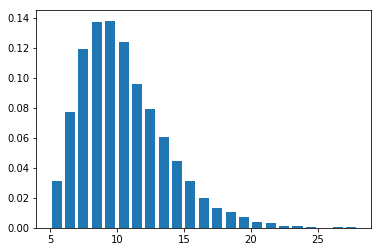

In [10]:
plt.hist(np.asarray(X), 
         np.arange(min(X), max(X)),
         rwidth=.75,
         density=True);

In [11]:
def forward_random_coin(p, n, y, nrepeat):
    freq = 0
    for i in range(nrepeat):
        obs_ = st.bernoulli.rvs(p, size=n)
        if obs_.sum() == y:
            freq += 1
    return freq/nrepeat

In [12]:
def forward_random_coin(p, n, y, nrepeat):
    obs_ = st.binom.rvs(n, p, size=nrepeat)
    return np.sum(obs_ == y)/nrepeat

In [14]:
forward_random_coin(.5, 9, 5, 10000)

0.2459

In [15]:
forward_random_coin(.75, 9, 5, 10000)

0.1221

In [16]:
st.binom.pmf(5, 9, .5)

0.2460937499999998

In [17]:
st.binom.pmf(5, 9, .75)

0.1167984008789062